<a href="https://colab.research.google.com/github/Rohanpeerla/Module-8-Lab-4/blob/master/Module_8_Lab_4_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

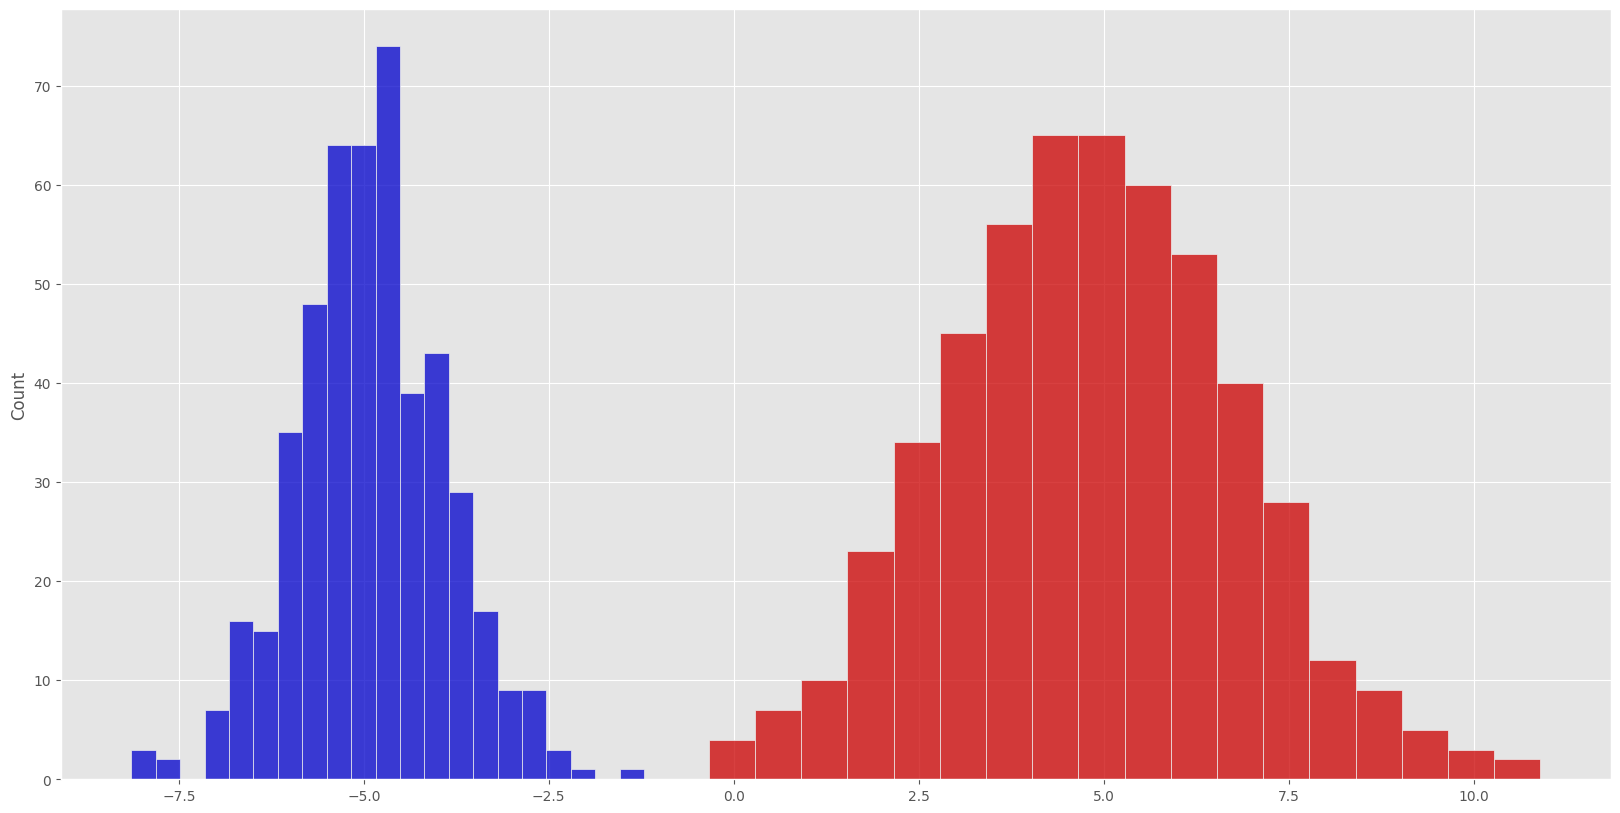

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate binary labels
y = np.random.choice([0, 1], p=[0.5, 0.5], size=1000)

# Define new parameters for the normal distributions
true_mu_1 = -5.0
true_mu_2 = 5.0
true_sigma_1 = 1.0
true_sigma_2 = 2.0

# Generate data points based on the labels and parameters
X = (y == 0) * np.random.normal(true_mu_1, true_sigma_1, size=len(y)) + \
    (y == 1) * np.random.normal(true_mu_2, true_sigma_2, size=len(y))

# Plot histograms of the data points
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(X[y == 0], ax=ax, color='#0000CC')
sns.histplot(X[y == 1], ax=ax, color='#CC0000')
plt.show()


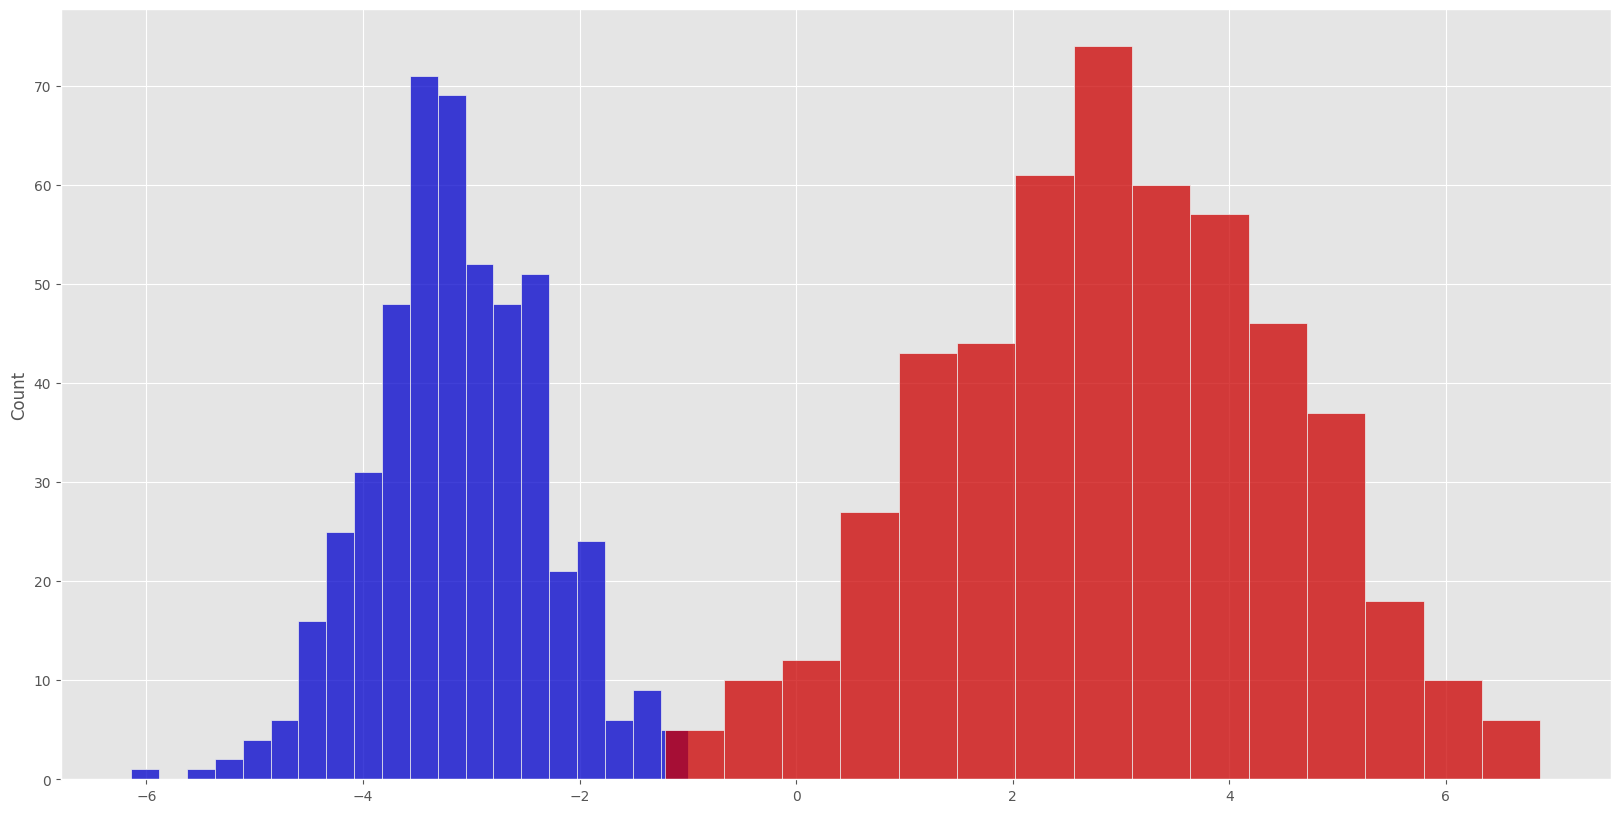

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate binary labels
y = np.random.choice([0, 1], p=[0.5, 0.5], size=1000)

# Define new parameters for the normal distributions
true_mu_1 = -3.0
true_mu_2 = 3.0
true_sigma_1 = 0.8
true_sigma_2 = 1.5

# Generate data points based on the labels and parameters
X = (y == 0) * np.random.normal(true_mu_1, true_sigma_1, size=len(y)) + \
    (y == 1) * np.random.normal(true_mu_2, true_sigma_2, size=len(y))

# Plot histograms of the data points
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(X[y == 0], ax=ax, color='#0000CC')
sns.histplot(X[y == 1], ax=ax, color='#CC0000')
plt.show()


[-4.88517615  4.85760553] [4.99761157 5.22051556]
[-3.50370731  3.69872494] [4.9158612  5.29841655]
[-2.86933494  3.13534513] [4.91517286 5.30194283]
[-2.48481707  2.78298323] [4.92492198 5.29468424]


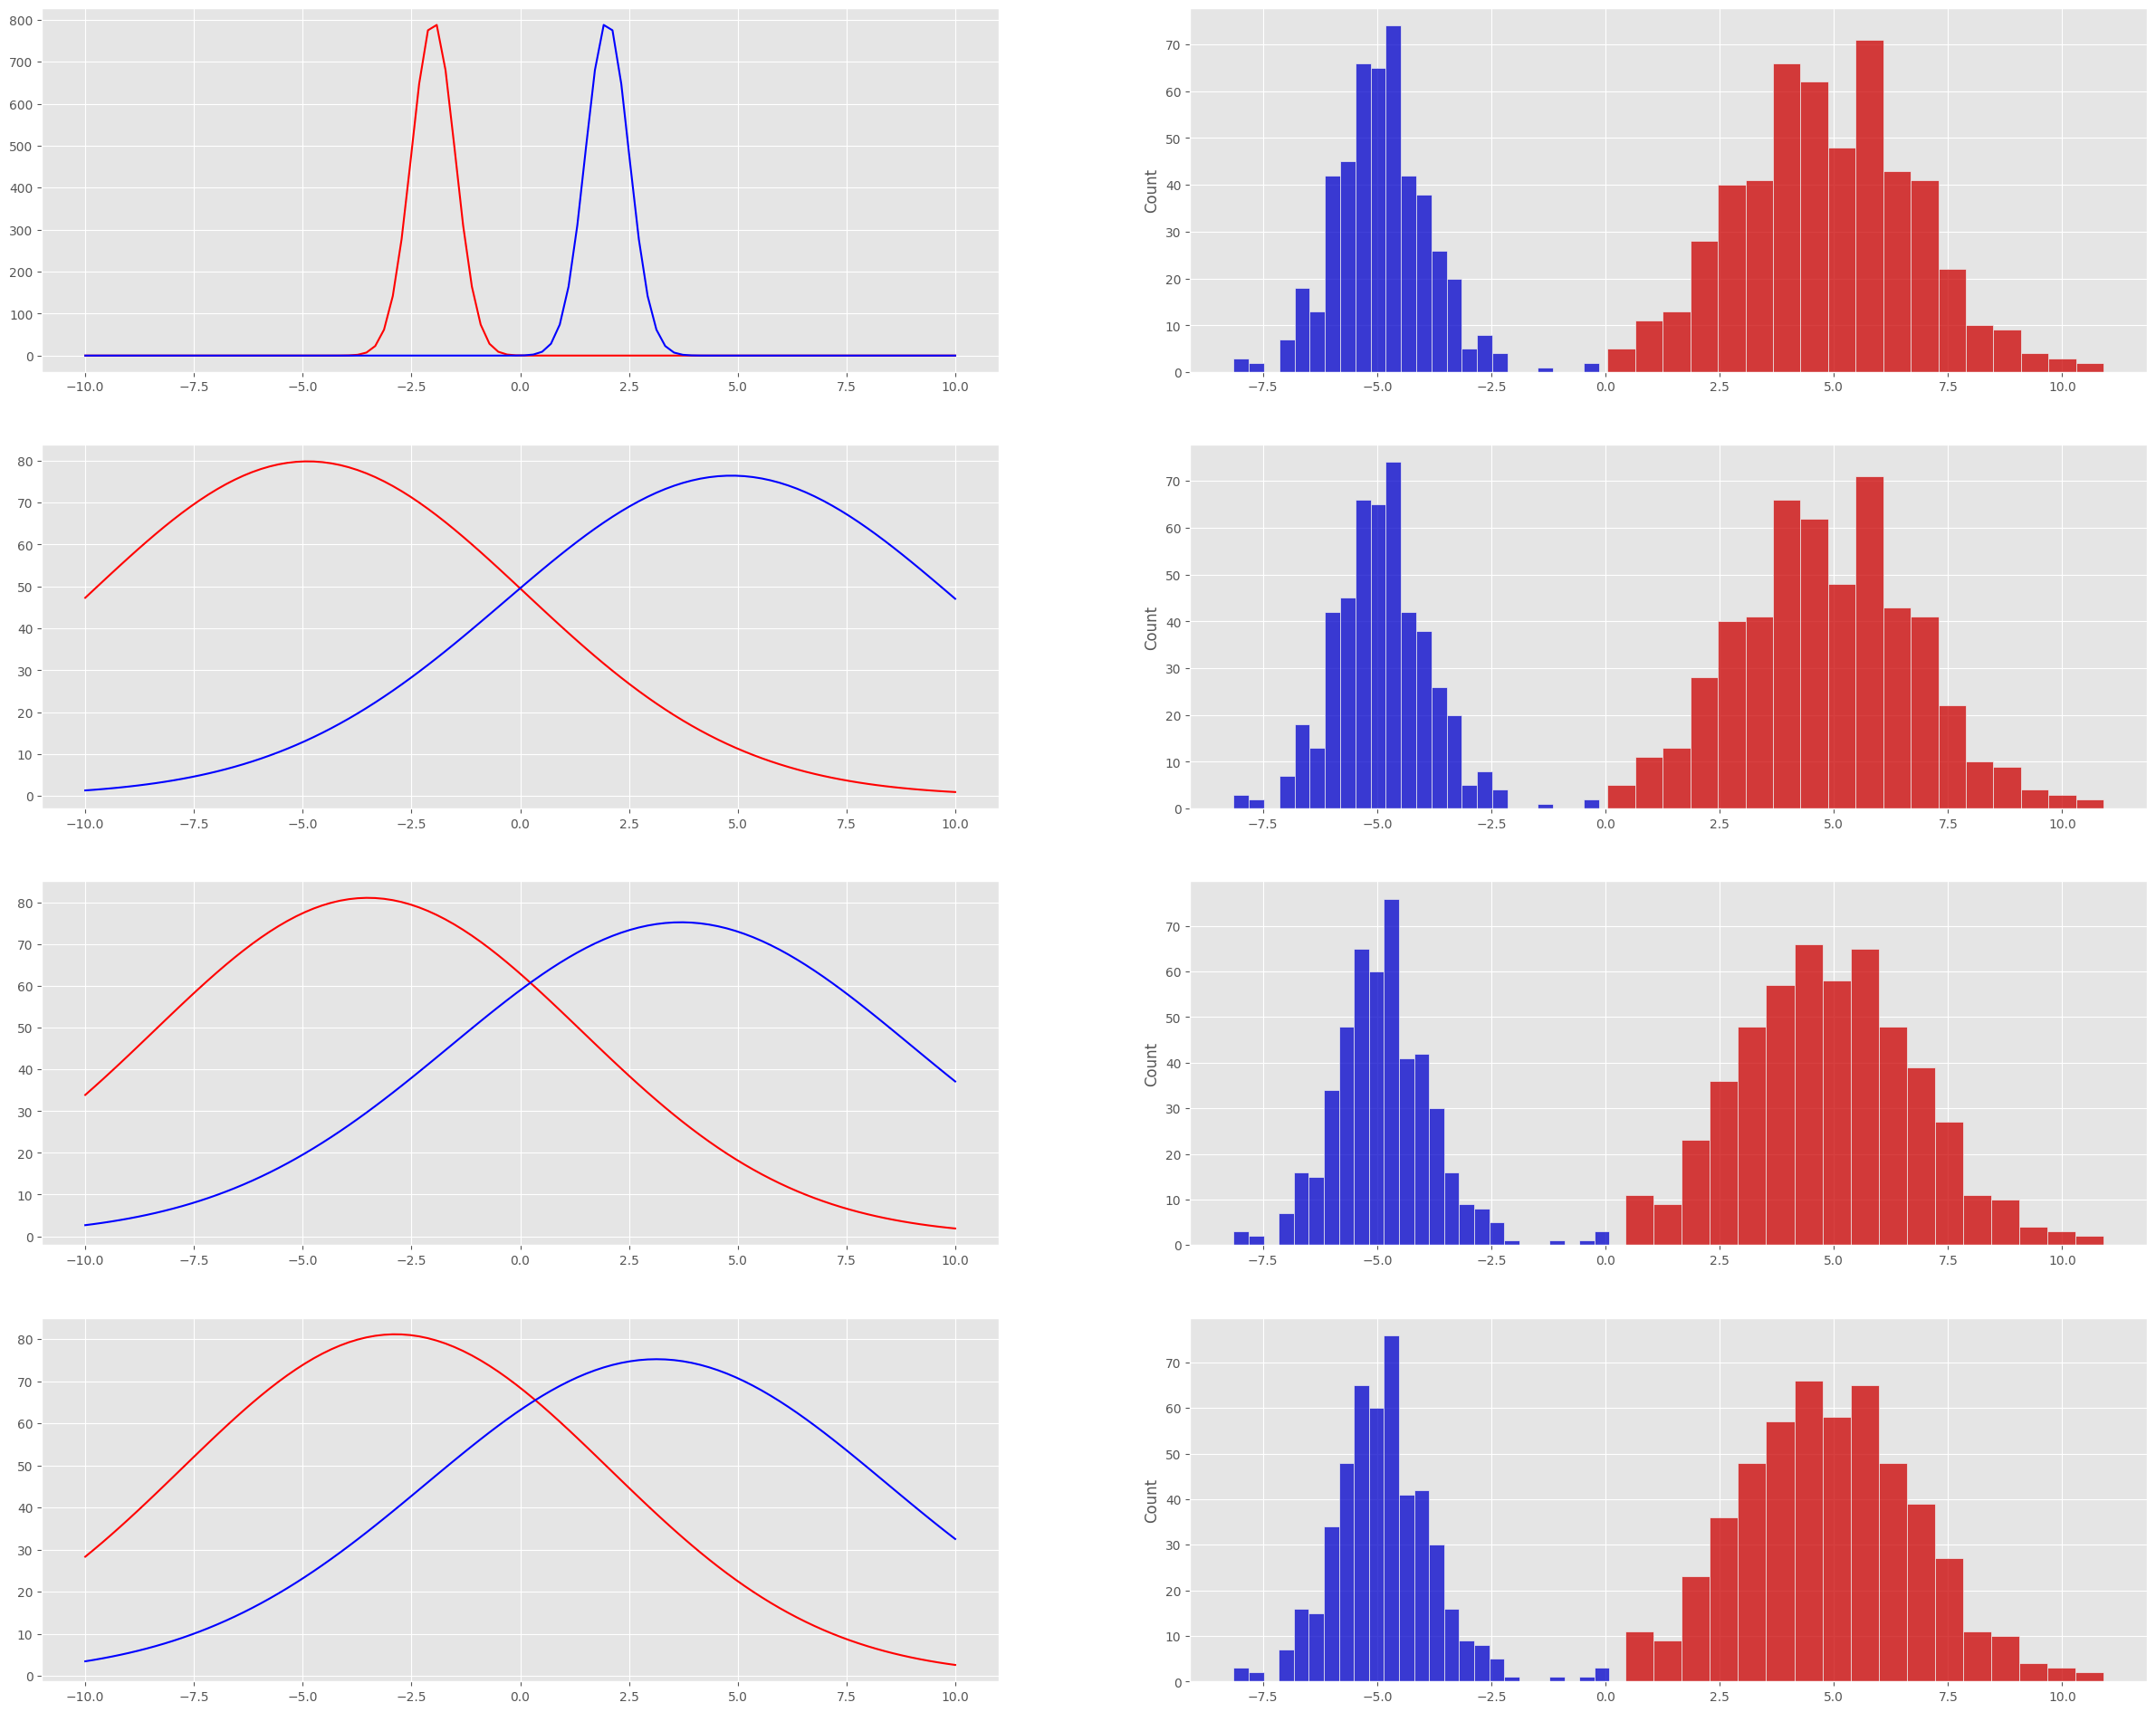

In [5]:
from matplotlib import rc
rc('animation', html='jshtml')

mu, sigma = np.array([-2, 2]), np.array([0.5, 0.5])  # Modified mean and standard deviation values
z = np.random.random(size=len(X))
fig, ax = plt.subplots(4, 2, figsize=(15 * 2, 6 * 4))
ax = ax.reshape(-1)

def gaussian(mu, sigma, X):
    return np.exp(-0.5 * ((X - mu) / sigma) ** 2) / (np.sqrt(2 * np.pi) * sigma)

def animate(i):
    global z, mu, sigma, ax
    ax[2 * i].cla()
    domain = np.linspace(-10, 10, 100)
    # Maximization Step
    p0 = gaussian(mu[0], sigma[0], X)
    p1 = gaussian(mu[1], sigma[1], X)
    z = p1 / (p0 + p1)
    ax[2 * i].plot(domain, 1000 * gaussian(mu[0], sigma[0], domain), color='r')
    ax[2 * i].plot(domain, 1000 * gaussian(mu[1], sigma[1], domain), color='b')
    # Plot stuff
    sns.histplot(X[z <= 0.5], ax=ax[2 * i + 1], color='#0000CC')
    sns.histplot(X[z > 0.5], ax=ax[2 * i + 1], color='#CC0000')
    # Expectation Step
    mu = np.array([np.sum((1 - z) * X) / np.sum(1 - z), np.sum(z * X) / np.sum(z)])
    sigma = np.array([np.sqrt(np.sum((1 - z) * X ** 2) / np.sum(1 - z)), np.sqrt(np.sum((z) * X ** 2) / np.sum(z))])
    print(mu, sigma)

for i in range(4):
    animate(i)



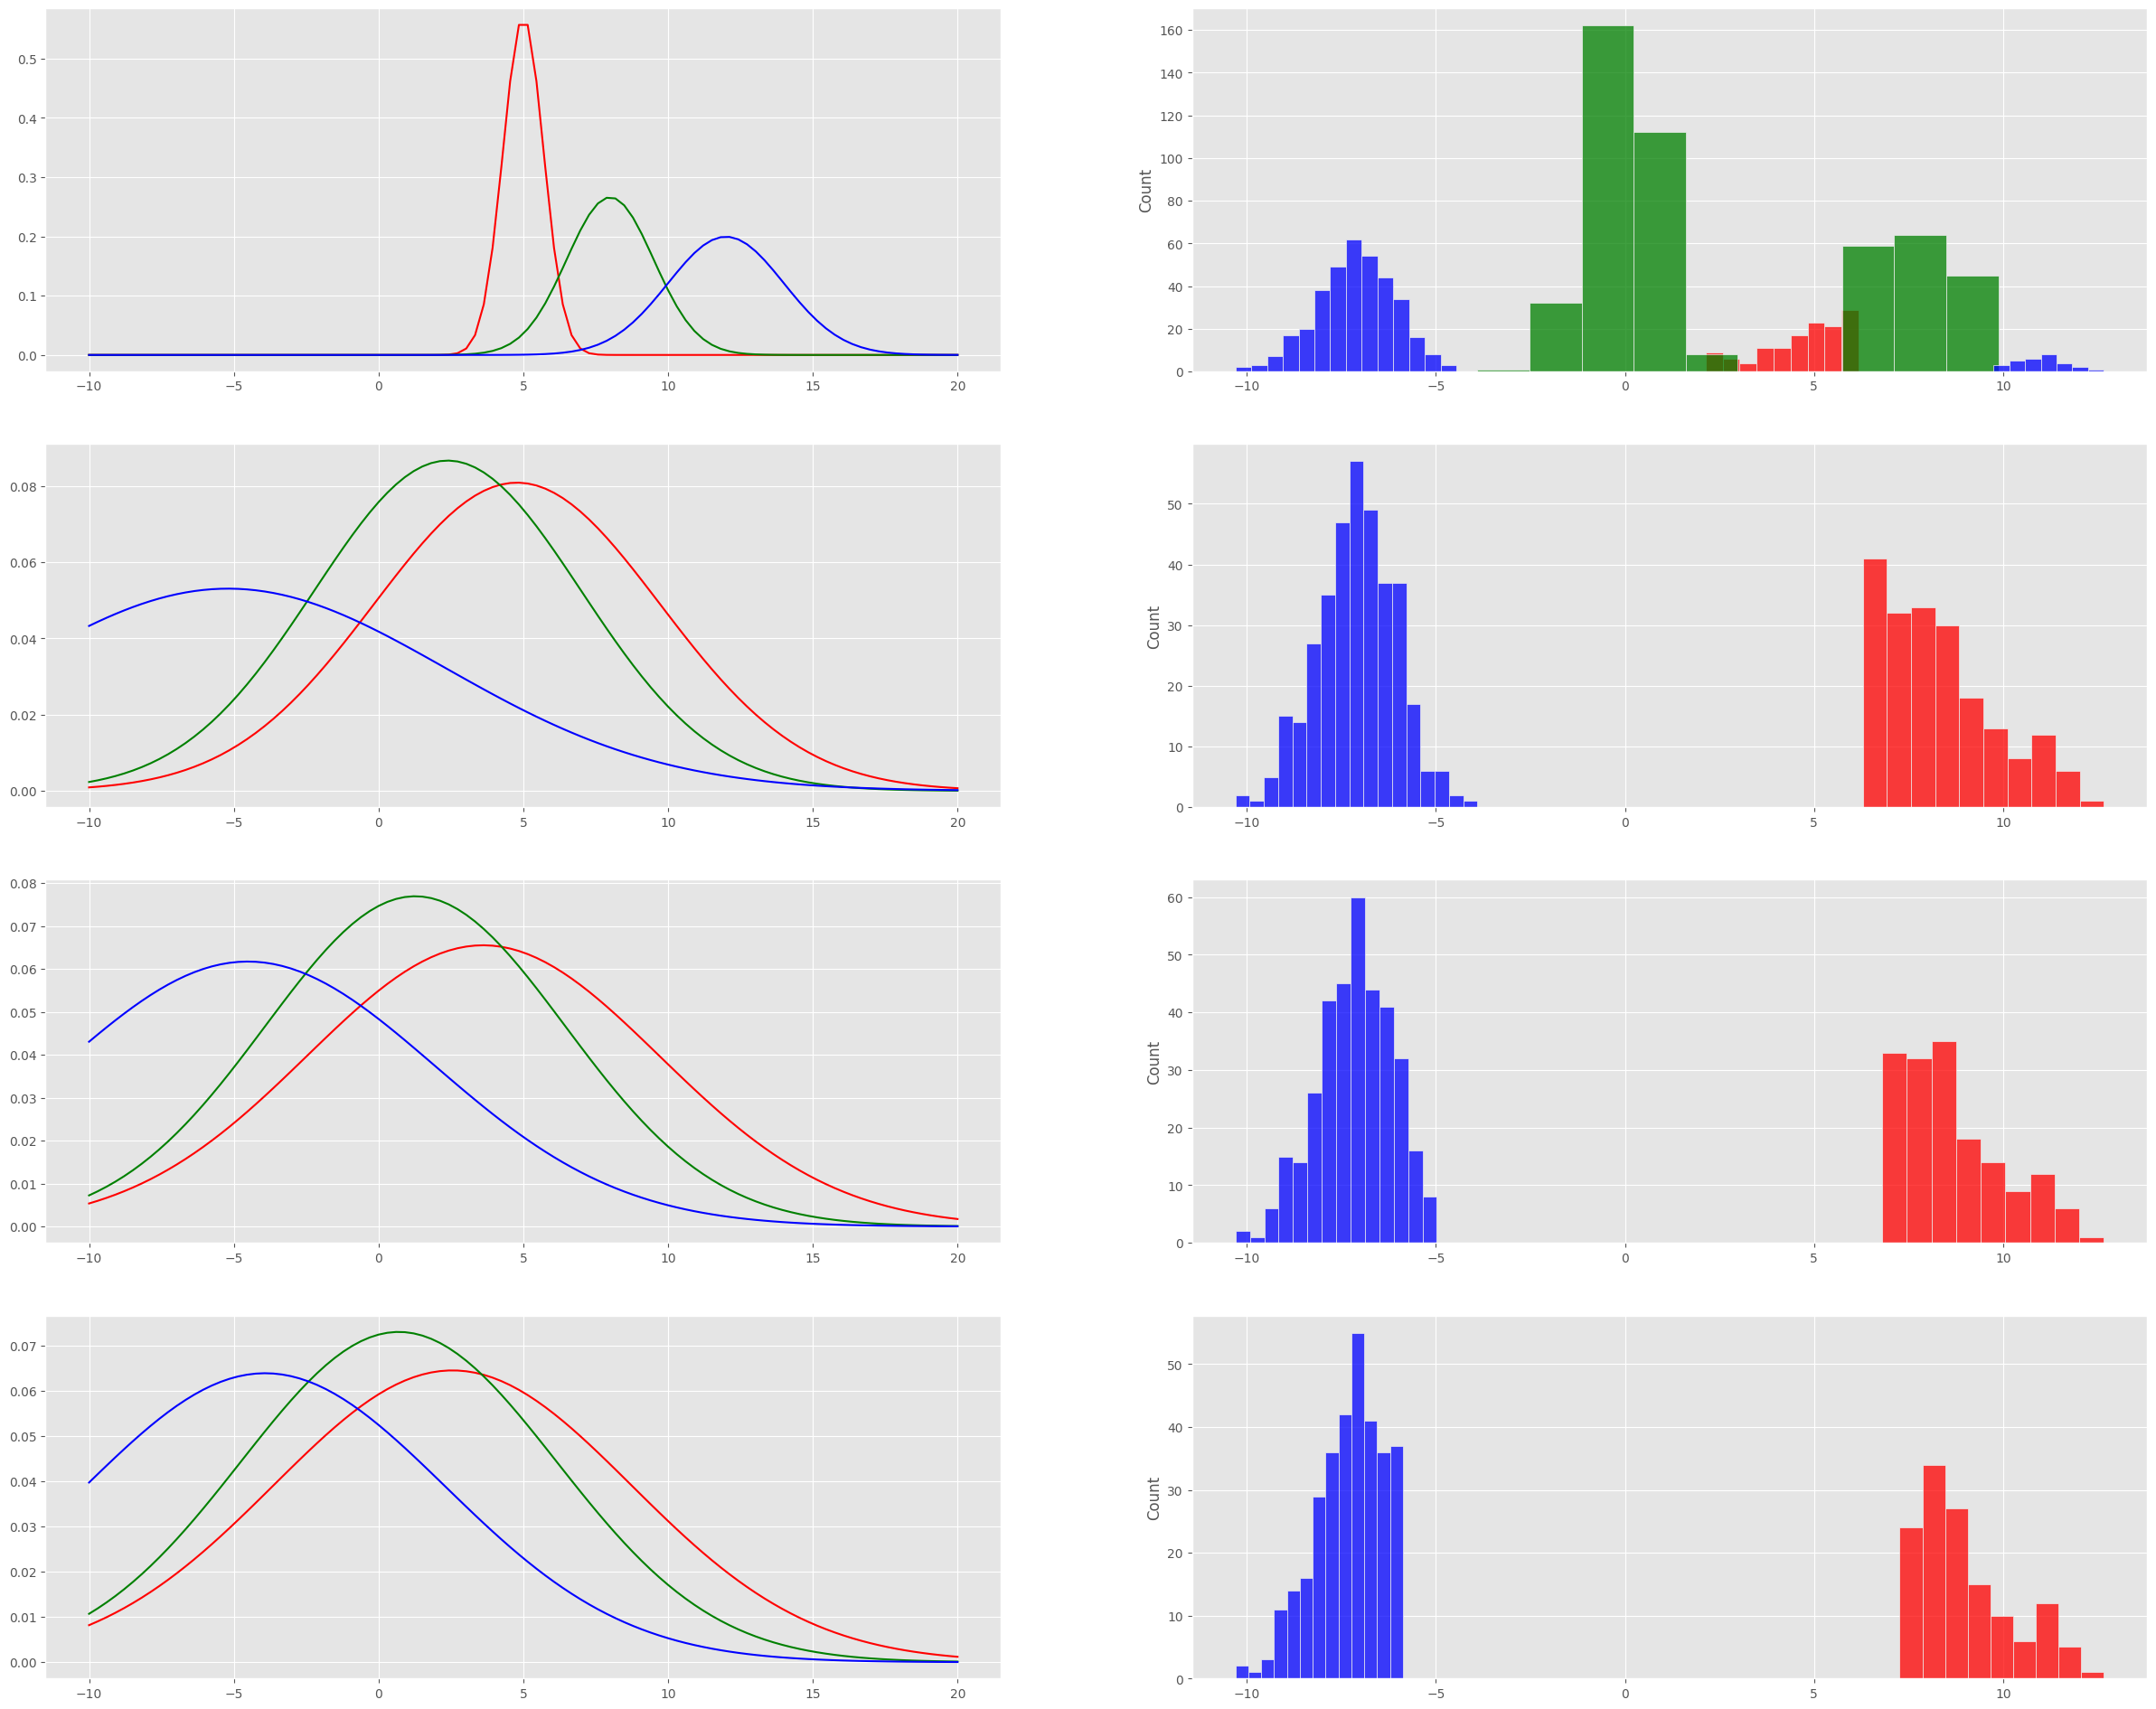

In [6]:
class GaussianMixture:

    def __init__(self, n_clusters, true_mu, true_sigma):
        self.n_clusters = n_clusters
        self.true_mu, self.true_sigma = true_mu, true_sigma
        self.y = np.random.choice(list(range(n_clusters)), p=[1/n_clusters for _ in range(n_clusters)], size=1000)
        self.X = np.sum(np.stack([(self.y == i) * np.random.normal(true_mu[i], true_sigma[i], size=len(self.y)) for i in range(n_clusters)], axis=0), axis=0)

        self.mu, self.sigma = np.array([5, 8, 12]), np.array([0.7, 1.5, 2.0])  # Modified mean and standard deviation values
        self.z = np.random.random((n_clusters, len(self.y)))
        self.z = self.z / np.reshape(np.sum(self.z, axis=0), (1, -1))
        self.colors = ['r', 'g', 'b', 'k', 'o', 'y'][:n_clusters]

    @staticmethod
    def gaussian(mu, sigma, X):
        return np.exp(-0.5 * ((X - mu) / sigma) ** 2) / (np.sqrt(2 * np.pi) * sigma)

    def expectation(self):
        self.mu = np.array([np.sum(self.z[i] * self.X) / np.sum(self.z[i]) for i in range(self.n_clusters)])
        self.sigma = np.array([np.sqrt(np.sum(self.z[i] * self.X ** 2) / np.sum(self.z[i])) for i in range(self.n_clusters)])

    def maximization(self):
        self.z = np.stack([self.gaussian(self.mu[i], self.sigma[i], self.X) for i in range(self.n_clusters)], axis=0)
        self.z = self.z / np.reshape(np.sum(self.z, axis=0), (1, -1))

    def plot_full(self, iterations):
        z = np.random.random(size=len(self.X))
        fig, ax = plt.subplots(iterations, 2, figsize=(15 * 2, 6 * iterations))

        if len(ax.shape) == 1:
            ax = ax.reshape(1, ax.shape[0])

        for iter in range(iterations):
            ax[iter][0].cla()
            domain = np.linspace(-10, 20, 100)  # Modified domain range
            self.maximization()
            for i in range(self.n_clusters):
                ax[iter][0].plot(domain, self.gaussian(self.mu[i], self.sigma[i], domain), color=self.colors[i])
            for i in range(self.n_clusters):
                sns.histplot(self.X[self.z[i] > 0.5], ax=ax[iter][1], color=self.colors[i])
            self.expectation()

    def plot_truth(self):
        fig, ax = plt.subplots(figsize=(20, 10))
        for i in range(self.n_clusters):
            sns.histplot(self.X[self.y == i], ax=ax, color=self.colors[i])
        plt.show()


gmm = GaussianMixture(3, [-7.0, 0.0, 7.0], [1.0, 1.0, 2.0])
gmm.plot_full(4)


<Axes: ylabel='Count'>

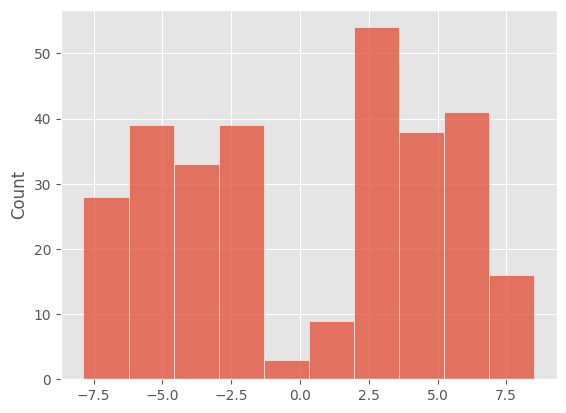

In [7]:
import numpy as np
import seaborn as sns


k = 4
ndata = 300
spread = 6
centers = np.array([-spread, -spread/2, spread/2, spread])

v = np.random.randint(0, k, ndata)
data = centers[v] + np.random.randn(ndata)

sns.histplot(data)


In [11]:
import numpy as np
install pip pymc3
import pymc3 as pm

# Set the parameters
k = 4  # Number of clusters
spread = 6  # Spread of the clusters
ndata = 300  # Number of data points

# Simulate data from mixture distribution
centers = np.array([-spread, -spread/2, spread/2, spread])
v = np.random.randint(0, k, ndata)
data = centers[v] + np.random.randn(ndata)

# Model setup
with pm.Model() as model:
    p = pm.Dirichlet('p', a=np.ones(k))
    means = pm.Normal('means', mu=np.linspace(-spread, spread, k), sigma=15, shape=k, testval=centers)
    sd = pm.Uniform('sd', lower=0, upper=20)
    obs = pm.NormalMixture('obs', w=p, mu=means, sigma=sd, observed=data)

    # Sampling
    trace = pm.sample(1000, tune=5000, return_inferencedata=True)



SyntaxError: invalid syntax (<ipython-input-11-d7de54552866>, line 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


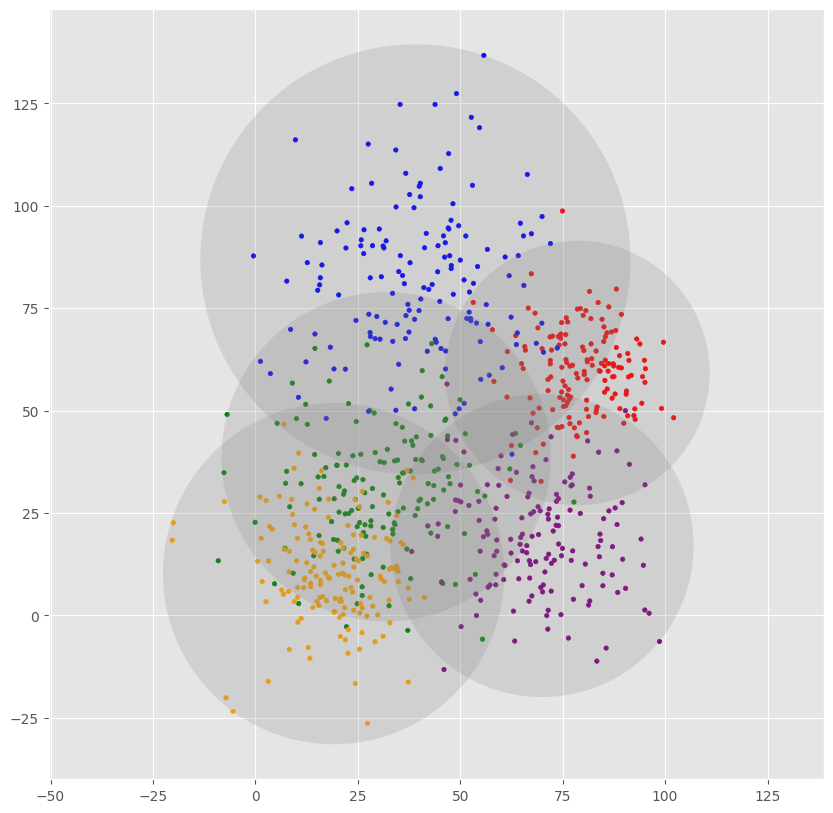

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster

size, classes = 150, 5
loc = np.array([[30, 30], [80, 60], [70, 20], [40, 80], [20, 10]])
var = np.array([[12, 15], [20, 10], [18, 13], [15, 17], [10, 12]])

# Generate new data
X = np.vstack([np.stack([np.random.normal(loc=mean[0], scale=variance[1], size=size),
                         np.random.normal(loc=mean[1], scale=variance[1], size=size)],
                        axis=-1) for mean, variance in zip(loc, var)])
y = np.hstack([np.full(size, fill_value=i) for i in range(classes)])

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=list(map(lambda x: color_map[x], y)), s=10)

    centers = kmeans.cluster_centers_
    radii = [np.sqrt(np.sum((X[labels == i] - center) ** 2, axis=1).max()) for i, center in enumerate(centers)]
    for i, (c, r) in enumerate(zip(centers, radii)):
        ax.add_patch(plt.Circle(c, r, fc='gray', lw=3, alpha=0.2, zorder=1))

kmeans = sklearn.cluster.KMeans(n_clusters=classes, random_state=0)
plt.figure(figsize=(10, 10))
plot_kmeans(kmeans, X, n_clusters=classes)
plt.show()


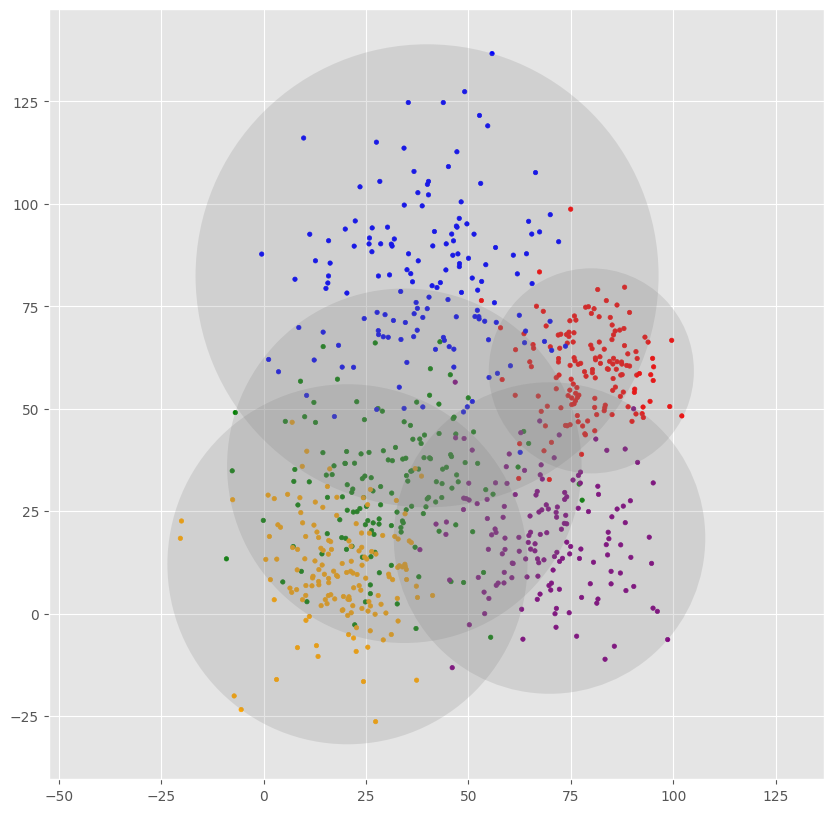

In [13]:
plt.figure(figsize=(10, 10))

def plot_gmm(gmm, X, n_components=4, rseed=0, ax=None):
    labels = gmm.fit_predict(X)

    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=list(map(lambda x: color_map[x], y)), s=10)

    centers = gmm.means_
    radii = [np.sqrt(np.sum((X[labels == i] - center) ** 2, axis=1).max()) for i, center in enumerate(centers)]
    for i, (c, r) in enumerate(zip(centers, radii)):
        ax.add_patch(plt.Circle(c, r, fc='gray', lw=3, alpha=0.2, zorder=1))

gmm = sklearn.mixture.GaussianMixture(n_components=5, random_state=0)  # Change the number of components
plot_gmm(gmm, X)
plt.show()


In [14]:
import matplotlib.tri as tri

# Define new corners for the triangle
corners = np.array([[0.1, 0.1], [0.9, 0.1], [0.5, 0.75**0.5]])

# Recalculate the AREA based on the new triangle
AREA = 0.5 * 0.8 * 0.75**0.5

# Create a new Triangulation object with the updated corners
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# Update the pairs of corners for the triangle
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]

# Define a new function for converting 2D Cartesian coordinates to barycentric
def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

# Define a new Dirichlet class instance with updated alpha values if necessary
alpha = [2, 2, 2]  # Update alpha values if needed
dist = Dirichlet(alpha)

# Redraw the PDF contours with the updated values
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

# Redraw the contours with updated values
draw_pdf_contours(dist)
plt.show()


NameError: name 'Dirichlet' is not defined

In [15]:
import matplotlib.tri as tri
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from math import gamma

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]


def xy2bc(xy, tol=1.e-4):
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / np.multiply.reduce([gamma(a) for a in self._alpha])

    def pdf(self, x):
        return self._coef * np.multiply.reduce([xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

@interact(x_weight=FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0),
          y_weight=FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0),
          z_weight=FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0))
def plot_dirichlet(x_weight, y_weight, z_weight):
    plt.figure(figsize=(10 * np.sqrt(3) / 2, 10))
    draw


interactive(children=(FloatSlider(value=1.0, description='x_weight', max=10.0), FloatSlider(value=1.0, descrip…

<Figure size 866.025x1000 with 0 Axes>

<Figure size 866.025x1000 with 0 Axes>

<Figure size 866.025x1000 with 0 Axes>

<Figure size 866.025x1000 with 0 Axes>

In [17]:
import nltk

nltk.download("stopwords")
nltk.download("inaugural")

from nltk.corpus import inaugural
from nltk.corpus import stopwords


custom_stopwords = set(["custom", "stop", "words", "here"])

corpus = inaugural.words()

filtered_corpus = [word for word in corpus if word.lower() not in custom_stopwords]

print(filtered_corpus[:100])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':', 'Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.', 'On', 'the', 'one', 'hand', ',', 'I', 'was', 'summoned', 'by', 'my', 'Country', ',', 'whose', 'voice', 'I', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'I', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as']


In [19]:
import pandas as pd
import nltk


nltk.download("stopwords")
nltk.download("inaugural")

from nltk.corpus import inaugural
from nltk.corpus import stopwords

custom_stopwords = set(["custom", "stop", "words", "here"])

data_dict = {'president': [], 'year': [], 'speech': []}

for fileid in inaugural.fileids():
    speech_string = ""

    for word in inaugural.words(fileid):
        word = word.lower()

        if word not in custom_stopwords and word.isalpha():
            speech_string += word + ' '

    data_dict["speech"].append(speech_string)
    data_dict["year"].append(fileid[:4])
    data_dict["president"].append(fileid[5:-4])

df = pd.DataFrame(data_dict)

print(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


     president  year                                             speech
0   Washington  1789  fellow citizens of the senate and of the house...
1   Washington  1793  fellow citizens i am again called upon by the ...
2        Adams  1797  when it was first perceived in early times tha...
3    Jefferson  1801  friends and fellow citizens called upon to und...
4    Jefferson  1805  proceeding fellow citizens to that qualificati...
5      Madison  1809  unwilling to depart from examples of the most ...
6      Madison  1813  about to add the solemnity of an oath to the o...
7       Monroe  1817  i should be destitute of feeling if i was not ...
8       Monroe  1821  fellow citizens i shall not attempt to describ...
9        Adams  1825  in compliance with an usage coeval with the ex...
10     Jackson  1829  fellow citizens about to undertake the arduous...
11     Jackson  1833  fellow citizens the will of the american peopl...
12    VanBuren  1837  fellow citizens the practice of all my pre

In [20]:
from collections import defaultdict
import numpy as np

vocab = defaultdict(int)


for idx, speech in enumerate(df["speech"]):
    # Split the speech into words and count their occurrences
    for word in speech.split():
        vocab[word] += 1


vocab = np.sort(np.array(list(filter(lambda x: vocab[x] > 50, vocab.keys()))))


word_to_index = {word: idx for idx, word in enumerate(vocab)}

print("Constructed Vocabulary of", len(vocab), "words.")


Constructed Vocabulary of 298 words.


Number of words accounted for: 94940 (68.72%)


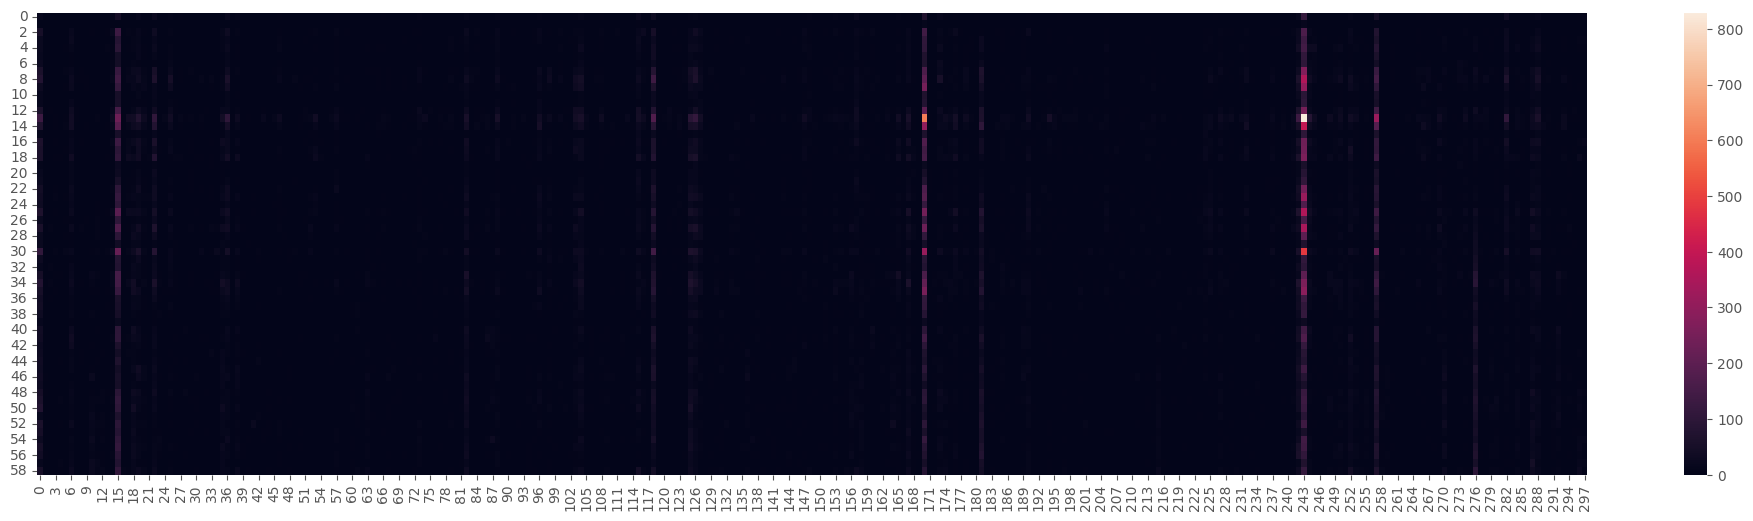

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

speech_vectors = np.zeros(shape=(len(df), len(vocab)))


for idx, speech in enumerate(df["speech"]):

    for word in speech.split():
        if word in word_to_index:
            speech_vectors[idx, word_to_index[word]] += 1

total_words_accounted = int(np.sum(speech_vectors))
percentage_of_total = 100 * total_words_accounted / np.sum(df['speech'].apply(lambda x: len(x.split())))
print(f"Number of words accounted for: {total_words_accounted} ({percentage_of_total:.2f}%)")

plt.figure(figsize=(25, 6))
sns.heatmap(speech_vectors)
plt.show()


In [24]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=4, random_state=0)


lda.fit(speech_vectors)

res = lda.transform(speech_vectors)


for i in range(4):
    top_words_indices = lda.components_[i].argsort()[:5]
    top_words = [vocab[idx] for idx in top_words_indices]
    print(f"Topic {i+1}: {' '.join(top_words)}")


Topic 1: revenue proper ought policy constitutional
Topic 2: americans help today know live
Topic 3: revenue proper constitutional general policy
Topic 4: revenue americans help ought policy


In [26]:
class LatentDirichletAllocation:

    def __init__(self, data, topics=10):
        """
        Takes the data variable and outputs a model
        """
        self.data = data
        self.num_topics, self.num_vocab, self.num_docs = topics, data.shape[1], data.shape[0]
        self.alpha, self.beta = np.ones(self.num_topics), np.ones(self.num_vocab)
        with pm.Model() as model:
            self.theta = pm.Dirichlet("thetas", a=self.alpha, shape=(self.num_docs, self.num_topics))
            self.phi = pm.Dirichlet("phis", a=self.beta, shape=(self.num_topics, self.num_vocab))
            self.z = pm.Categorical("zx", p=self.theta, shape=(self.num_docs,))
            self.w = pm.Categorical("wx", p=self.phi[self.z], observed=self.data.reshape(-1))
        self.model = pm.Model([self.theta, self.phi, self.z, self.w])
        self.mcmc = pm.MCMC(self.model)

    def fit(self, iterations=1000, burn_in=10):
        self.mcmc.sample(iterations, burn=burn_in)

    @property
    def topics(self):
        return self.phi.value

    @property
    def words(self):
        return self.num_vocab

    @staticmethod
    def kl_divergence(p, q):
        return np.sum(p*np.log(p/q))

    @staticmethod
    def cosine_similarity(x, y):
        return np.dot(x, y) / np.sqrt(np.dot(x, x) * np.dot(y, y))

    def sorted_docs_sim(self):
        kldivs_docs = [(i, j, self.kl_divergence(self.theta[i].value,self.theta[j].value),
                        self.cosine_similarity(self.data[i], self.data[j]))
                       for i in range(len(self.theta)) for j in range(len(self.theta))
                       if i != j]
        return sorted(kldivs_docs, key=lambda x: x[3], reverse=True)

    def show_topic_words(self, idwords, n=10):
        for i, t in enumerate(self.phi.value):
            print("Topic %i : " % i, ", ".join(idwords[w_] for w_ in np.argsort(t)[-n:]))

    def plot_words_per_topic(self, ax=None):
        if ax is None:
            plt.clf()
            fig, ax = plt.subplots(1,1)
        words = self.z.value
        topic_dist = dict()
        for k in words:
            if k not in topic_dist:
                topic_dist[k] = 0
            topic_dist[k] += 1
        ax.bar(topic_dist.keys(), topic_dist.values())
        ax.set_xlabel("Topics")
        ax.set_ylabel("Counts")
        ax.set_title("Document words per topics")
        plt.show()

    def plot_word_dist(self, ax=None):
        topics = self.phi.value
        if ax is None:
            plt.clf()
            fig, ax = plt.subplots((len(topics)+1)//2, 2, figsize=(10,10))
        for i, t in enumerate(topics):
            ax[i//2][i%2].bar(range(len(t)), t)
            ax[i//2][i%2].set_title("Topic %s" % i)
        plt.suptitle("Vocab word proportions per topic")
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.show()
